# Assignment #2 - Classification

<font color="red"> <b> Due: Feb 28 (Friday) 11:00 pm </b> </font>

<font color="blue"> PA PA OO </font>

# I. Introduction
The objective of the assignment is to classify dataset by using Supervised function (machine learning tool). Supervised machine learning algorithms define models that capture relationships among data. Classification is an area of supervised machine learning that tries to predict which class or category some entity belongs to, based on its features. It is used after the learning process to classify new records (data) by giving them the best target attribute (prediction). There are different types of classifiers, a classifier is an algorithm that maps the input data to a specific category. I used the following algorithm to complete my assignment: 
1.	Pocket Algorithm 
2.	Logistic Regression


# II. Data

## 1. Introduction of data for classification data & source

Car Evaluation Dataset

This dataset includes 1728 instances about cars’ standard. The data contains categorical values, I converted those features into integers. The quality of cars is measured by two main groups of standards which are price (buying price and maintenance cost) and technical characteristics (comfort and safety). The level of comfort is determined by number of persons can fit in the car, number of doors and luggage boot size. Applying classification model will allow us to know which car criteria is likely will be pass the evaluation and which decision nodes are significant in classifying. 

Attributes Information 

buying price: vhigh, high, med, low. 

maintenance cost: vhigh, high, med, low. 

number of doors: 2, 3, 4, 5more. 

number of persons: 2, 4, more. 

luggage boot size: small, med, big. safety: low, med, high 

Class Values: 

rate: unacc, acc, good, vgood

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from copy import deepcopy as copy
from IPython.core.debugger import set_trace
from mpl_toolkits.mplot3d import Axes3D
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler
from sklearn import model_selection

from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report,accuracy_score, f1_score

In [2]:
df_col_names = ['buying price','maintenance cost','number of doors','number of persons','luggage boot size', 'safety', 'rate']

# header argument says the first line is a datapoint, not column names. 
# names argument says what to use as the column names
df = pd.read_csv('car.data', header=None, names=df_col_names)

df

,buying price,maintenance cost,number of doors,number of persons,luggage boot size,safety,rate
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
5,vhigh,vhigh,2,2,med,high,unacc
6,vhigh,vhigh,2,2,big,low,unacc
7,vhigh,vhigh,2,2,big,med,unacc
8,vhigh,vhigh,2,2,big,high,unacc
9,vhigh,vhigh,2,4,small,low,unacc


In [3]:
for i in df.columns:
    print(df[i].value_counts())
    print()

high     432
low      432
vhigh    432
med      432
Name: buying price, dtype: int64

high     432
low      432
vhigh    432
med      432
Name: maintenance cost, dtype: int64

5more    432
3        432
4        432
2        432
Name: number of doors, dtype: int64

more    576
4       576
2       576
Name: number of persons, dtype: int64

small    576
med      576
big      576
Name: luggage boot size, dtype: int64

high    576
low     576
med     576
Name: safety, dtype: int64

unacc    1210
acc       384
good       69
vgood      65
Name: rate, dtype: int64



In [4]:
#Convert feature values to integers (0, 1,2,3,4,5)
df['buying price'].replace(('low', 'med', 'high', 'vhigh'), (0, 1, 2, 3), inplace = True)
df['maintenance cost'].replace(('low', 'med', 'high', 'vhigh'), (0, 1, 2, 3), inplace = True)
# df['number of doors'].replace('5more', 5, inplace = True)
# df['number of persons'].replace('more', 5, inplace = True)
df['luggage boot size'].replace(('small', 'med', 'big'), (0, 1, 2), inplace = True)
df['safety'].replace(('low', 'med', 'high'), (0, 1, 2), inplace = True)
df['rate'].replace(('unacc', 'acc', 'good', 'vgood'), (1, 2, 3, 4), inplace = True)




In [5]:
#Convert feature values to integers (0, 1,2,3,4,5)

doors = {'1': 1, '2':2, '3':3, '4':4,'5more':5}
persons = {'1': 1, '2':2, '3':3, '4':4, 'more':5}

#TODO: Convert the string values in columns 'month' and 'day' to integers like we did last week.
df['number of doors'] = df['number of doors'].apply(lambda x: doors[x])
df['number of persons'] = df['number of persons'].apply(lambda x: persons[x])
df

,buying price,maintenance cost,number of doors,number of persons,luggage boot size,safety,rate
0,3,3,2,2,0,0,1
1,3,3,2,2,0,1,1
2,3,3,2,2,0,2,1
3,3,3,2,2,1,0,1
4,3,3,2,2,1,1,1
5,3,3,2,2,1,2,1
6,3,3,2,2,2,0,1
7,3,3,2,2,2,1,1
8,3,3,2,2,2,2,1
9,3,3,2,4,0,0,1


In [6]:
classification = df['rate'].value_counts().sort_index()
classification

1    1210
2     384
3      69
4      65
Name: rate, dtype: int64

In [7]:
safety = df['safety'].value_counts().sort_index()
safety

0    576
1    576
2    576
Name: safety, dtype: int64

## 2. Visualization of the data

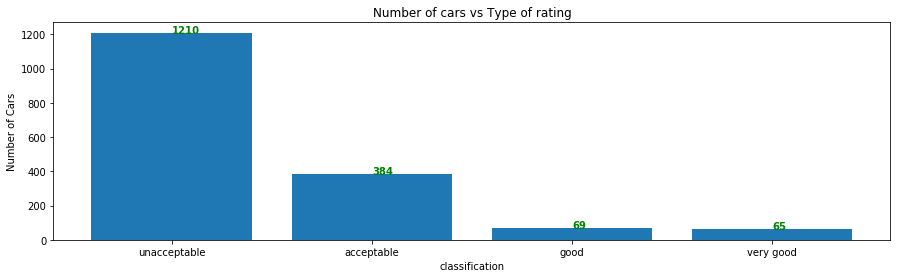

In [8]:
# Plots
Index = [1,2,3,4]
plt.figure(figsize=(15,4))
plt.bar(Index,classification,color = 'blue')
plt.xticks(Index,['unacceptable','acceptable','good','very good'],rotation=360)
plt.ylabel('Number of Cars')
plt.xlabel('classification')
plt.title('Number of cars vs Type of rating')
plt.bar(Index, classification)
for a,b in zip(Index, classification):
    plt.text(a, b, str(b) ,color='green', fontweight='bold')
plt.show()

# sns.countplot(df['rate'])

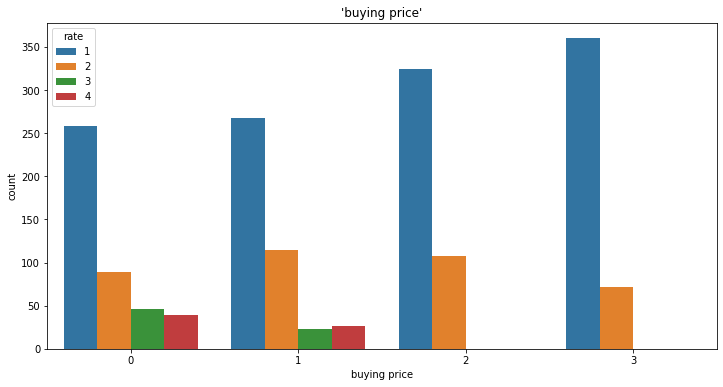

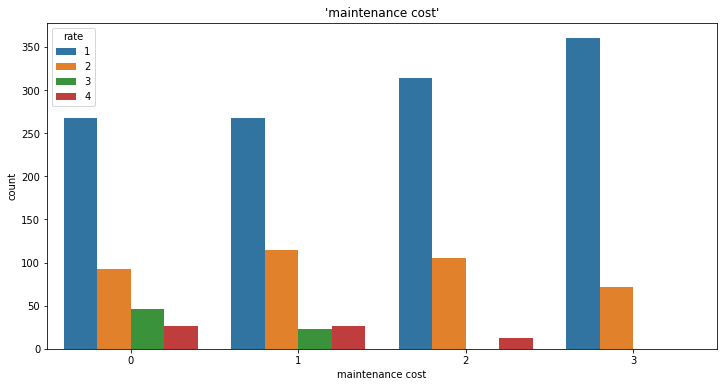

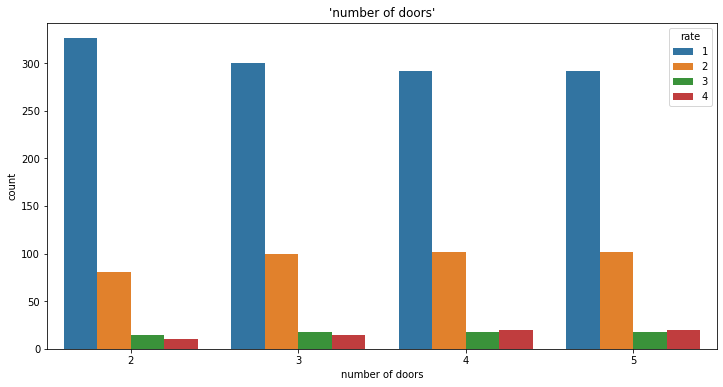

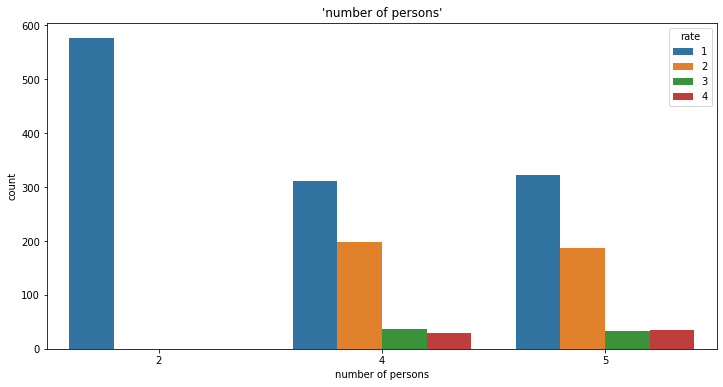

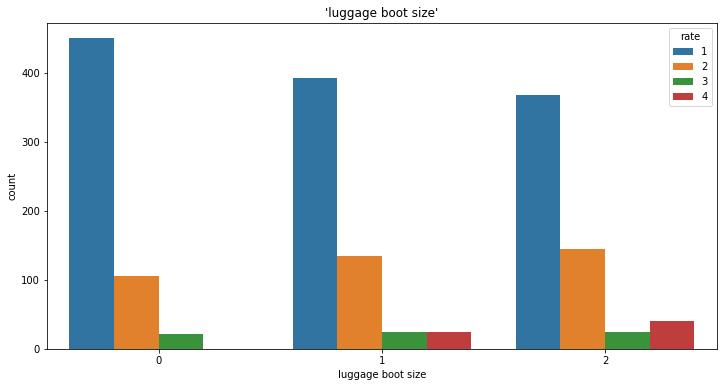

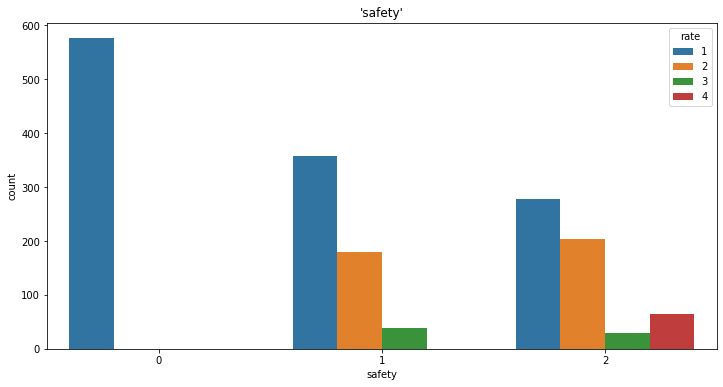

In [9]:
for i in df.columns[:-1]:
    plt.figure(figsize=(12,6))
    plt.title("'%s'"%i)
    sns.countplot(df[i],hue=df['rate'])

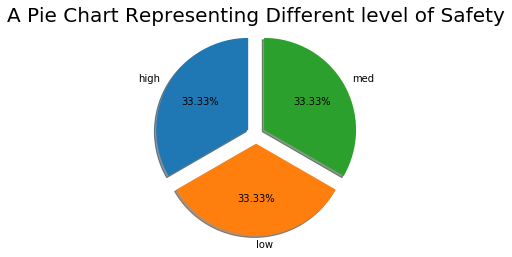

In [10]:
labels = ['high', 'low', 'med']
sizes = [576,576,576]
explode = [0.1, 0.1, 0.1]

fig1, ax1 = plt.subplots()
plt.pie(sizes, explode=explode, labels=labels,autopct = '%.2f%%', shadow = True, startangle=90)
plt.title('A Pie Chart Representing Different level of Safety', fontsize = 20)
ax1.axis('equal') 

plt.show()


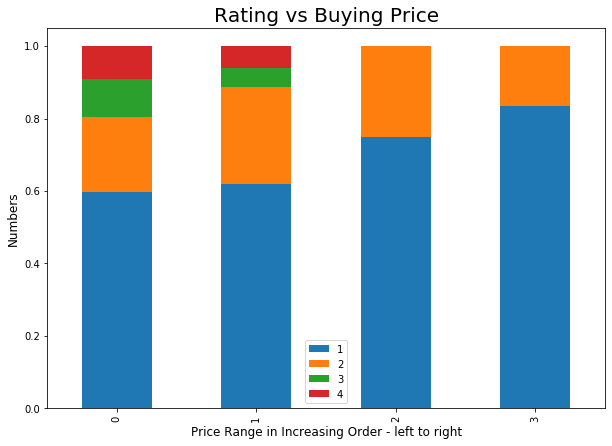

In [11]:
price = pd.crosstab(df['buying price'], df['rate'])
price.div(price.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True, figsize = (10, 7))

plt.title('Rating vs Buying Price', fontsize = 20)
plt.xlabel('Price Range in Increasing Order - left to right', fontsize = 12)
plt.ylabel('Numbers', fontsize = 12)
plt.legend()
plt.show()

In [12]:
df.shape

(1728, 7)

In [13]:
# newdf = df.loc[df['rate'] < 1 , 'rate'] = 1
# newdf.loc[newdf['rate'] > 1, 'rate'] = -1

df['rate'][df['rate'] == 1] = 1
df['rate'][df['rate'] > 1] = -1

df

,buying price,maintenance cost,number of doors,number of persons,luggage boot size,safety,rate
0,3,3,2,2,0,0,1
1,3,3,2,2,0,1,1
2,3,3,2,2,0,2,1
3,3,3,2,2,1,0,1
4,3,3,2,2,1,1,1
5,3,3,2,2,1,2,1
6,3,3,2,2,2,0,1
7,3,3,2,2,2,1,1
8,3,3,2,2,2,2,1
9,3,3,2,4,0,0,1


In [14]:
# print(dataset_binary['Cover_Type'].value_counts())
# print(dataset_binary.shape)

newrate = df['rate'].value_counts().sort_index()
newrate

-1     518
 1    1210
Name: rate, dtype: int64

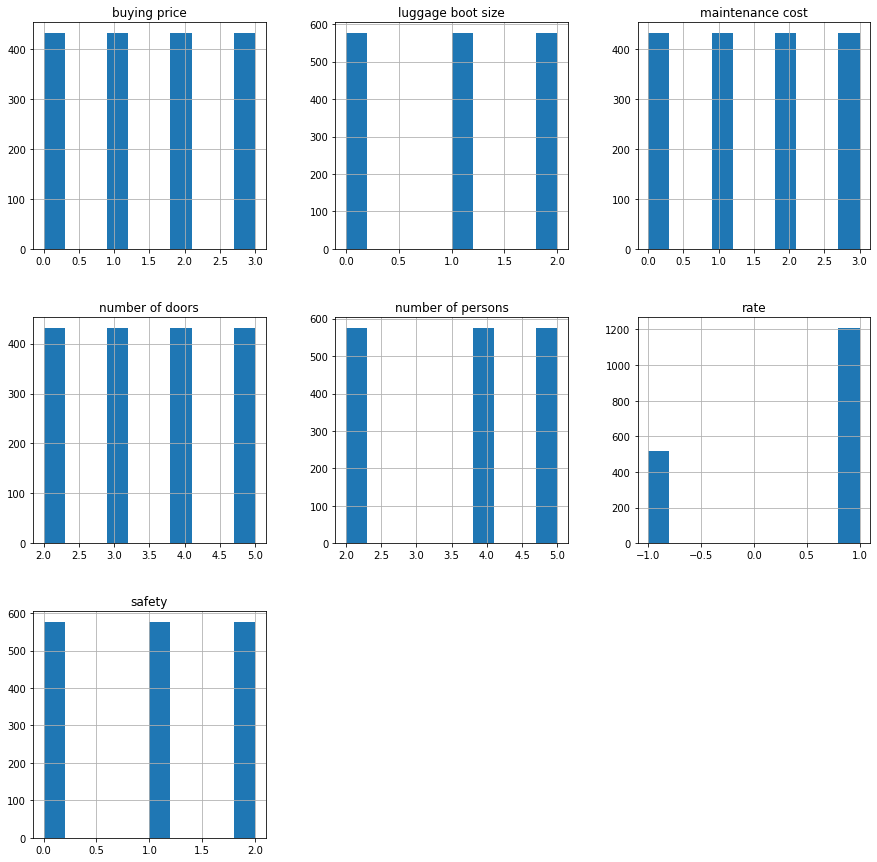

In [15]:
# sns.distplot( a=df, hist=True, kde=False, rug=False )
hist = df.hist(bins=10, figsize=(15,15))

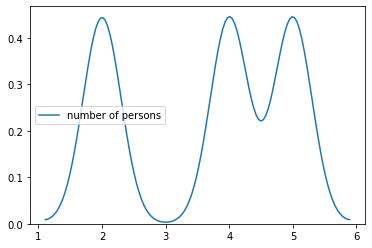

In [16]:
# Hist only
sns.kdeplot(df['number of persons'])


In [17]:
for i in df.columns:
    print(df[i].value_counts())
    print()

3    432
2    432
1    432
0    432
Name: buying price, dtype: int64

3    432
2    432
1    432
0    432
Name: maintenance cost, dtype: int64

5    432
4    432
3    432
2    432
Name: number of doors, dtype: int64

5    576
4    576
2    576
Name: number of persons, dtype: int64

2    576
1    576
0    576
Name: luggage boot size, dtype: int64

2    576
1    576
0    576
Name: safety, dtype: int64

 1    1210
-1     518
Name: rate, dtype: int64



## Preliminary observation

In linear classification, the goal is to predict a likelihood a given example belong to which output class. There are many criteria in consideration of buying a car such as price, comfort, safety and cost. As seen from the pie chart above, number of doors are not a significant factor of considering in buying a car. Furthermore, maintenance cost is more likely higher for cars which recommended as “unacceptable” and “acceptable”. As seen from the plots above, number of persons fit into a car is one of the criteria when people evaluate cars. 

# III. Method

# Summary of Classification models

## Pocket

In machine learning, the perceptron is an algorithm for supervised learning of binary classifiers. Perceptron algorithm is relevant when the input space is linearly separable. A binary classifier is a function which can decide whether or not an input, represented by a vector of numbers, belongs to some specific class. It is a type of linear classifier, i.e. a classification algorithm that makes its predictions based on a linear predictor function combining a set of weights with the feature vector. 


The extend of the Perceptron Learning Algorithm is by a simple modification, so-called Pocket Learning Algorithm. The idea is straightforward: this algorithm keeps the best result seen so far in its pocket (that is why it is called Pocket Learning Algorithm). The best result means the number of misclassifications is minimum. If the new weights produce a smaller number of misclassification than the weights in the pocket, then replace the weights in the pocket to the new weights; if the new weights are not better than the one in the pocket, keep the one in the pocket and discard the new weights. At the end of the training iteration, the algorithm returns the solution in the pocket, rather than the last solution.


## Logistic Regression

Logistic regression is a traditional and classic statistical model, which has been widely used in the academy and industry. Unlike linear regression, which is used to make a prediction on the numeric response, logistic regression is used to solve a classification problem. Logistic regression is used when the dependent variable is binary in nature. Logistic regression is the appropriate regression analysis to conduct when the dependent variable is dichotomous (binary).  Like all regression analyses, the logistic regression is a predictive analysis.  Logistic regression is used to describe data and to explain the relationship between one dependent binary variable and one or more nominal, ordinal, interval or ratio-level independent variables.

# Explanation of codes

Two algorithms are implemented which are Pocket and Logistic regressio. Under a base class which is so called “BaseModel”, there is two abstract method which are 'train' and 'use'. After initialize the “init”, two classes train(self,X,T) and use(self,X) are being defined.

The baseModel has train and use defined. The train takes self,X,Y as inputs, where as use takes self,X as inputs. The classifier is an abstract class for classification. . It contains 'init', 'normalize', 'check_matrix', 'add_ones', 'train', 'use' defined. The init initializes the class.The normalize is used for normalization of two data type:  the training and testing data. check_matrix is used for checking matrices. Train is used for training the model. add_ones() checks whether the matrix is two D array or not and if it is, it adds a column of 1s at the beginning of the matrix.


Pocket

The pocket algorithm is child class of the super class classifier. It will implement all the abstract methods of its super class. It has two functions train and use. The train function is used for training the data. 
Initialize the pocket weight vector, For each training iteration, perform the following sub-steps:

1.	Run the training step of Perceptron Learning Algorithm to obtain the updated weight vector, w where t indicates the current iteration. 2
2.	Evaluate weight by comparing the number of misclassification on the entire sample set with the number of misclassification performed by wpocket. 
3.	If w is better than wpocket, replace wpocket to w. 
4.	Return wpocket when the training iteration terminates.

Use(self,X): This method return the new predictions (vectors) by calculating the with the dot product of “w” in train method and matrix. 


Logistic Regression

The Logistic Regression algorithm is child class of the super class classifier. It will implement all the abstract methods of its super class. It has two functions train and train. The train function is used for training the data. 

Train function takes input matrices X and T. It calculates the number of features and number of unique classes in T which implement in “use” function. It performs normalization and add one column to X. 

The function g(self,X,T) is the logistic function, also known as the softmax function. It normalize exponential function, is a function that takes as input a vector of K real numbers, and normalizes it into a probability distribution consisting of K probabilities proportional to the exponentials of the input numbers. In other words, the softmax function transforms each element of a collection by computing the exponential of each element divided by the sum of the exponentials of all the elements. 


# Pocket, Logistic Regression

In [18]:
# # Assign the three X, T, and N variables with proper values.
# Xp = df.iloc[:, :-1]
# Tp = df.iloc[:, -1] 
# Np = Xp.shape[0]

# Assign the three X, T, and N variables with proper values.
X = df.loc[:, df.columns!= 'rate']
T = df['rate']
N = len(df)

In [19]:
# Convert to numpy arrays
Xpocket = X.values
Tpocket = T.values #define the target variable (dependent variable) as y

### A. Super Classs Definition

In [20]:
import numpy as np
from abc import ABC, abstractmethod

# Super class for machine learning models 

class BaseModel(ABC):
    """ Super class for ITCS Machine Learning Class"""
    
    @abstractmethod
    def train(self, X, T):
        pass

    @abstractmethod
    def use(self, X):
        pass

    

class Classifier(BaseModel):
    """
        Abstract class for classification 
        
        Attributes
        ==========
        meanX       ndarray
                    mean of inputs (from standardization)
        stdX        ndarray
                    standard deviation of inputs (standardization)
    """

    def __init__(self, ):
        self.meanX = None
        self.stdX = None

    def normalize(self, X):
        """ standardize the input X """
        
        if not isinstance(X, np.ndarray):
            X = np.asanyarray(X)

        self.meanX = np.mean(X, 0)
        self.stdX = np.std(X, 0)

        # TODO: Finish this normalization
        Xs = (X-self.meanX)/self.stdX
        return Xs

    def _check_matrix(self, mat, name):
        if len(mat.shape) != 2:
            raise ValueError(''.join(["Wrong matrix ", name]))
        
    # add a basis
    def add_ones(self, X):
        """
            add a column basis to X input matrix
        """
        self._check_matrix(X, 'X')
        return np.hstack((np.ones((X.shape[0], 1)), X))

    ####################################################
    #### abstract funcitons ############################
    @abstractmethod
    def train(self, X, T):
        pass
    
    @abstractmethod
    def use(self, X):
        pass 

### B. Pocket Algorithm


In [21]:
from copy import deepcopy as copy 
import pandas as pd
class Pocket(Classifier): 
    
    
    def __init__(self):
        
        self.maxiter=100 # Max number passes to make over the data
        self.alpha = 0.01
        self.w = None
        self.w_pocket = None
        self.mean =None
        self.stdX = None
        self.X1train = None
        
# return 1 if w is better -1 if wp is better
   
    def compare(self,X, T, w, wp):
        y = np.sign(X @ w)
        yp = np.sign(X @ wp)

        return 1 if np.sum(y == T) >= np.sum(yp == T) else -1

    
    def train(self,X,T):        
        N = Xtrain.shape[0]
        Dtrain = Xtrain.shape[1] # Number of columns in Xtrain
        self.X1train = np.hstack((np.ones((N, 1)), Xtrain.reshape((N, -1))))
        
#         w = np.zeros(3)
#         w_pocket = copy(w)
        
        self.w = np.zeros(Dtrain+1)
        self.w_pocket=copy(self.w)
        
        
        for i in range(self.maxiter):
            
            converged = True
            for k in range(N):
                y = self.w @ self.X1train[k]
                
                if np.sign(y) != np.sign(Ttrain[k]):
                    self.w += self.alpha * Ttrain[k] * self.X1train[k]
                    converged = False
                    
                    if self.compare(self.X1train, Ttrain, self.w, self.w_pocket) > 0: 
                        self.w_pocket[:] = self.w[:]
    
            if converged:
                print("converged at ", i)
                break
    
        
    def use(self, X):
        y= np.sign(self.X1train @ self.w_pocket)
        return y

# IV. Experiments

### plots for results 

In [22]:
# Splitting the training and test data
# Splitting the data into train(90%) and test(10%)
from sklearn.model_selection import train_test_split
Xtrain, Xtest, Ttrain, Ttest = train_test_split(Xpocket, Tpocket, test_size=0.2)
print("Train data shape: {}".format(Xtrain.shape))
print("Train target shape: {}".format(Ttrain.shape))
print("Test data shape: {}".format(Xtest.shape))
print("Test target shape: {}".format(Ttest.shape))

Train data shape: (1382, 6)
Train target shape: (1382,)
Test data shape: (346, 6)
Test target shape: (346,)


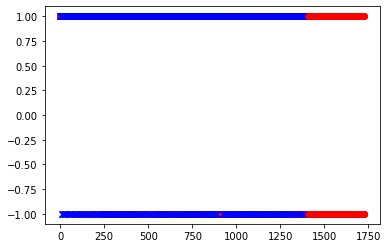

In [23]:
pocket = Pocket()
Xtrain = pocket.normalize(Xtrain)
pocket.train(Xpocket, Tpocket)

y_pred_poc_train = pocket.use(Xtrain)

y_pred_poc_test = pocket.use(Xtest)

plt.plot(T, 'ro')
plt.plot(y_pred_poc_train, 'bx')

### E. Logistic Regression

Please refer to another notebook file for Logistic Regression.

## Discussion about evaluation metrics

## Confusion Matrix
A confusion matrix is a technique for summarizing the performance of a classification algorithm. Classification accuracy alone can be misleading if you have an unequal number of observations in each class or if you have more than two classes in your dataset. Calculating a confusion matrix can give us a better idea of what our classification model is getting right and what types of errors it is making. The number of correct and incorrect predictions are summarized with count values and broken down by each class.
Below is the process for calculating a confusion Matrix. 

    - A test dataset is needed with expected outcome values.
    - Make a prediction for each row in the test dataset.
    - From the expected outcomes and predictions count:
            The number of correct predictions for each class.
            The number of incorrect predictions for each class, organized by the class that was predicted.
These numbers are then organized into a table, or a matrix as follows:

    Expected down the side: Each row of the matrix corresponds to a predicted class.
    Predicted across the top: Each column of the matrix corresponds to an actual class.



## Precision, Recall, and F1-score 
Now that we have our confusion matrix we can use it to compute new metrics that inform us about different aspects of our models performance. Recall that we discussed precision, recall, and the F1-score in the class notes. Let's do a quick review of what these scores mean and how to compute them.

### Precision
Precision represents the accuracy when only looking at our **positive predictions**. Meaning, we want to know how many of our positive predictions were correct out of all the positive predictions made. Hence, we divide by the sum of the true positives $\mathrm{TP}$ and false positives $\mathrm{FP}$. Notice, the sum these two variables is equal the total number of positive predictions made for a given class.
$$
Precision = \mathrm{\frac{TP}{TP + FP}}
$$

### Recall
Recall represents the accuracy when only looking at the **positive targets**. This means we want to know how many positive predictions we got correct out of the actual positive targets. Hence, we divide by the sum of true positives $\mathrm{TP}$ and false negatives $\mathrm{FN}$. Notice the sum these two variables is equal the total number of targets for a given class.
$$
Recall = \mathrm{\frac{TP}{TP + FN}}
$$

### F1-score
The F1-score is used to gain a combined measure of both precision and recall. To do so we calculate the harmonic mean (the reciprocal of the arithmetic mean) of the precision and recall scores. F1-score is a good alternative to accuracy if the number false negatives and false positives are important to your problem. 
$$
F_1 = 2 \times \frac{Precision \times Recall}{Precision+Recall} = \frac{2 \times tp}{2 \times tp + fp + fn}
$$

### Confusion Matrix

In [24]:
def confusion_matrix(Y, T):
    """
        Y    ndarray
             predicted labels
        T    ndarray
             target labels
             
        @cfm DataFrame
             confusion matrix
    """
    # TODO (1): Add code here
    if len(Y) != len(T):
        raise ValueError("Wrong prediction and target length!")
    
    classes = np.unique(T)
    n_classes = len(classes)
    
    cfm = pd.DataFrame(np.zeros((n_classes, n_classes)), index=classes, columns=classes, dtype=int)
    
    Tidx = [T == c for c in classes]
    for c in classes:
        pred_idx = Y == c
        cfm.loc[c, :] = [np.sum(np.logical_and(pred_idx, tidx)) for tidx in Tidx]
    
    return cfm

## Discussion about train and test accuracies

Both of my accuracy does not obtain 100 percent in training and test data. There are a number of scenarios lead to be less than 100 percent. One of the reasons is the size of training data in data science competitions. For good and correct accuracy, your testing data must be drawn from a similar population as your training data and must contain appropriate representation of the classes in your training data. 

Accuracy: The amount of correct classifications / the total amount of classifications.
The train accuracy: The accuracy of a model on examples it was constructed on.
The test accuracy is the accuracy of a model on examples it hasn't seen.


# Discussions about classificaion model comparison

The perceptron classification algorithm is a more basic procedure, based on dot products between examples and weights. Whenever an example is misclassified the sign of the dot product is at odds with the classification value (−1 and 1) in the training set. To correct this, the example vector will be iteratively added or subtracted from the vector of weights or coefficients, progressively updating its elements. 
The hypothesis in logistic regression provides a measure of uncertainty in the occurrence of a binary outcome based on a linear model. The output is bounded asymptotically between 00 and 11, and depends on a linear mode. Logistic Regression, which again is a classifier but uses a more complex activation function derived from taking the inverse of logit (link) function which gives you the output in the range between 0 to 1. If we draw the shape of this function, you will see it to be a S shape that gives the name of function as sigmoid (crescent shape).


# Conclusions

I think Logistic regression  is better. Logistic regression is a very powerful algorithm, even for very complex problems it may do a good job. Actually, with the right representation of the features, it can do a fantastic job. When dealing with non-linear problems, we sometimes try to represent the original data in a way that may be explained linearly. For me, studying Logistic regression first helped a lot when I started to learn Neural Networks. You can think of each neuron in the network as a Logistic Regression, it has the input, the weights, the bias we do a dot product to all of that, then apply some non linear function.


I have learned a lot by doing this assignment. I have to review lab and note before I start the assignment to understand how exactly the function works and what it return. I spent so much time in understanding of converting indicator and changing negative and positive number under pocket algorithm.

# References

https://towardsdatascience.com/6-steps-to-write-any-machine-learning-algorithm-from-scratch-perceptron-case-study-335f638a70f3

https://en.wikipedia.org/wiki/Perceptron#Variants

https://www.codeproject.com/Articles/1229772/Machine-Learning-Basics-Pocket-Learning-Algorithm

https://pathmind.com/wiki/accuracy-precision-recall-f1

https://towardsdatascience.com/an-introduction-to-logistic-regression-8136ad65da2e

https://medium.com/@simran.tinani/the-perceptron-learning-algorithm-is-one-of-the-simplest-machine-learning-algorithms-and-a-6ab04c5772ad

https://towardsdatascience.com/understanding-logistic-regression-step-by-step-704a78be7e0a